In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
wineqt =pd.read_csv('WineQT.csv')

In [3]:
wineqt.shape

(1143, 13)

In [4]:
wineqt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
wineqt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
wineqt.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wineqt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Chemical Qualities Analysis:

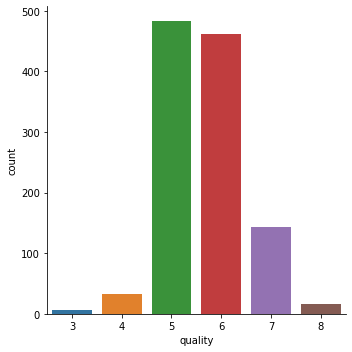

In [8]:
# Number of values for each quality
sns.catplot(x='quality', data=wineqt, kind = 'count')

In [9]:
print("Summary statistics for fixed acidity:")
print(wineqt['fixed acidity'].describe())

print("\nSummary statistics for density:")
print(wineqt['density'].describe())

Summary statistics for fixed acidity:
count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

Summary statistics for density:
count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64


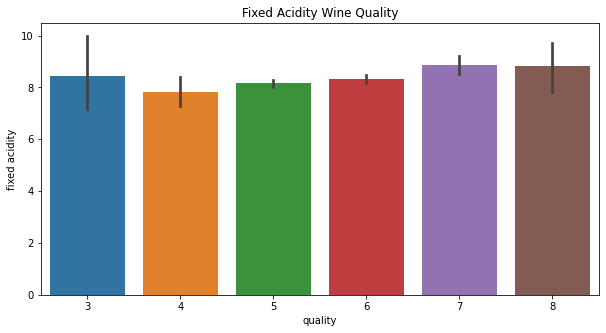

In [10]:
# Fixed Acidity and Wine Quality
plot = plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='fixed acidity', data=wineqt)
plt.title('Fixed Acidity Wine Quality')
plt.show()

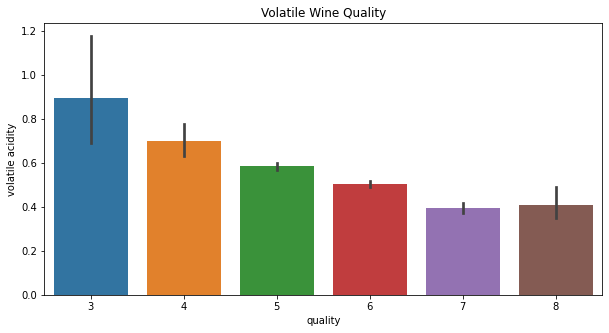

In [11]:
# Volatile Acidity and Wine Quality
plot = plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='volatile acidity', data=wineqt)
plt.title('Volatile Wine Quality')
plt.show()

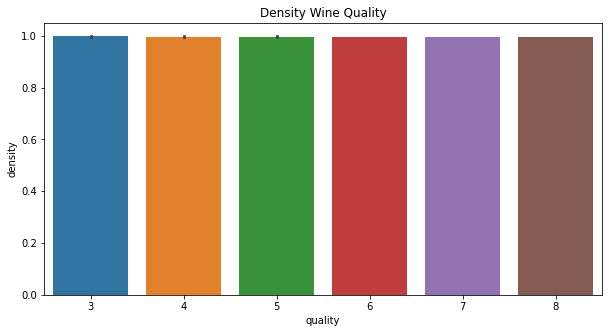

In [12]:
# Density and Wine Quality
plot = plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='density', data=wineqt)
plt.title('Density Wine Quality')
plt.show()

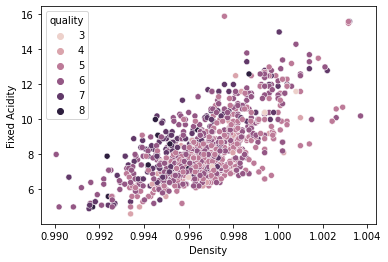

In [13]:
# Bivariate Analysis
sns.scatterplot(x='density', y='fixed acidity', hue='quality', data=wineqt)
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')
plt.show()

# Analysing the features like Density and Acidity as predictor for Wine Quality: 

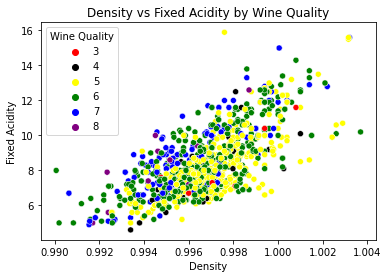

In [14]:
# Density vs Fixed Acidity by Wine Quality
palette = {3: 'red', 4: 'black', 5: 'yellow', 6: 'green', 7: 'blue', 8: 'purple'}
sns.scatterplot(x='density', y='fixed acidity', hue='quality', data=wineqt, palette = palette)
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')
plt.title('Density vs Fixed Acidity by Wine Quality')
plt.legend(title='Wine Quality')
plt.show()

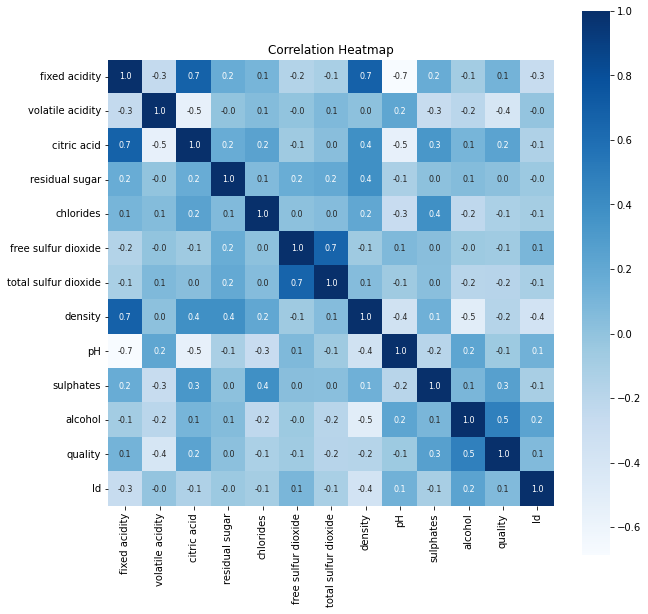

In [15]:
# Correlation between the columns
correlation = wineqt.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

plt.title('Correlation Heatmap')
plt.show()


# Utilizing Random Forest, SGD and SVC for wine quality prediction:

In [16]:
# Prepare features and target variable
x = wineqt.drop(['quality', 'Id'], axis=1)
y = wineqt['quality']

In [17]:
# Split data into training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


In [18]:
# Initialize and  train RandomForest classifier models
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
# Initialize and train SGD classifier models
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

In [20]:
# Initialize and train SVC classifier models
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

SVC()

# Evaluate Models

# Random Forest Classifire Heatmap

Random Forest Accuracy: 0.6593886462882096


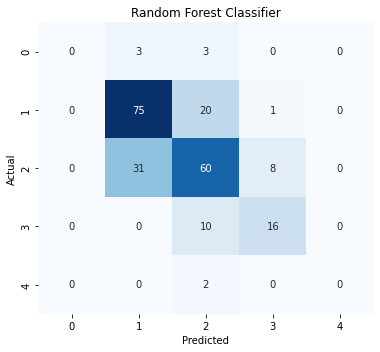

In [21]:
# Predictions for each classifier
rf_pred = rf_classifier.predict(x_test)

# Confusion matrices
rf_cm = confusion_matrix(y_test, rf_pred)

# accuracy on test data
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print("Random Forest Accuracy:", rf_accuracy)


# Plotting heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# SGD Classifire Heatmap

Stochastic Gradient Descent Accuracy: 0.5240174672489083


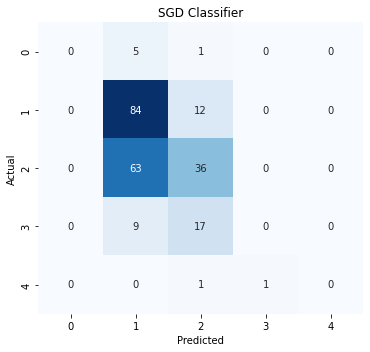

In [22]:
# Predictions for each classifier
sgd_pred = sgd_classifier.predict(x_test)

# Confusion matrices
sgd_cm = confusion_matrix(y_test, sgd_pred)

# accuracy on test data
sgd_accuracy = accuracy_score(y_test, sgd_classifier.predict(x_test))
print("Stochastic Gradient Descent Accuracy:", sgd_accuracy)

# Plotting heatmaps
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# SVC Heatmap

Support Vector Classifier Accuracy: 0.5633187772925764


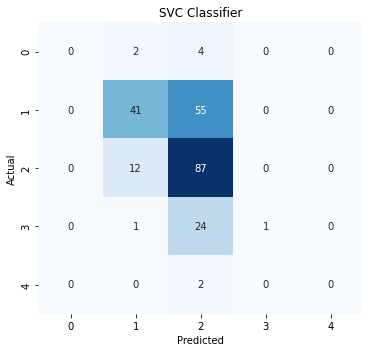

In [23]:
# Predictions for each classifier
svc_pred = svc_classifier.predict(x_test)

# Confusion matrices
svc_cm = confusion_matrix(y_test, svc_pred)

# accuracy on test data
svc_accuracy = accuracy_score(y_test, svc_classifier.predict(x_test))
print("Support Vector Classifier Accuracy:", svc_accuracy)

# Plotting heatmaps
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVC Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Building a Predictive System

In [24]:
#  changing the input data to a numpy array
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = rf_classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[7]
Bad Quality Wine
